# KNN From Scratch


To learn KNN better, I made KNN from scratch and tried that on a database which is lungs from people who could be covid, normal or phenomena.

In [113]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib as plt
import matplotlib.pyplot as plt 
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
# Here are the necessary libraries for KNN process

In [114]:
def convolutionalFilter(image):
    kernel_size = 5
    kernel = np.ones((kernel_size, kernel_size) ,np.float32)/(kernel_size**2)
    convolution_2d = cv2.filter2D(image,-1,kernel)
    return convolution_2d

Using 2D convolutional filter is one of the best for KNN algorithm. 2D convolution is convolving both horizontal and vertical directions in 2 dimensional spatial domain. Convolution is frequently used for image processing, such as smoothing, sharpening, and edge detection of images.
Here are an eximple how the process work:
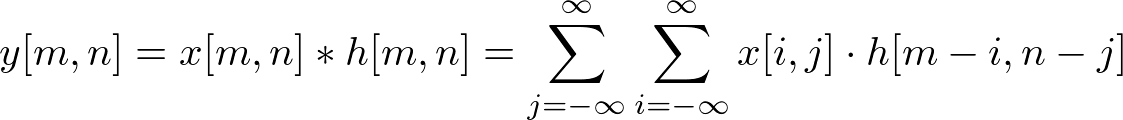




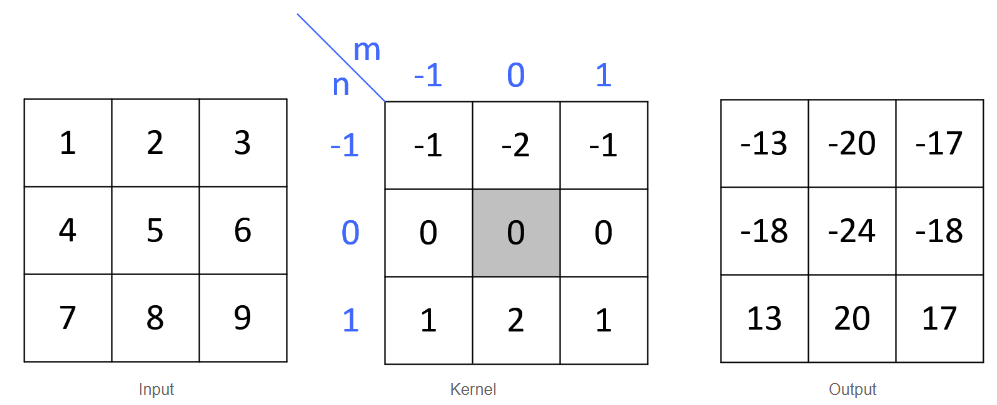

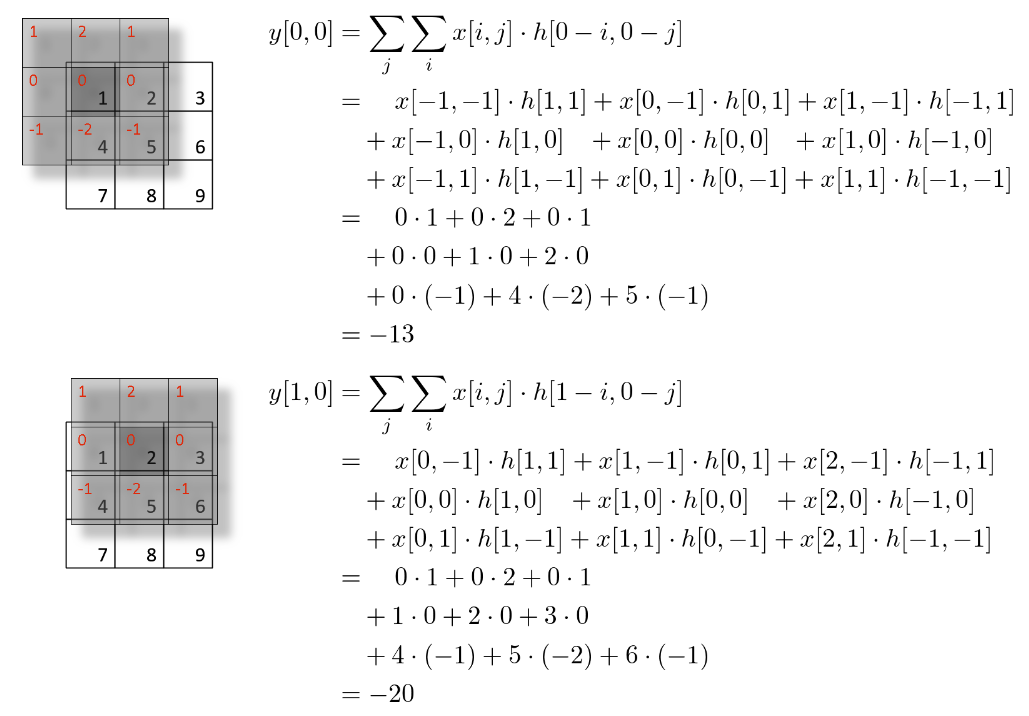

Source: http://www.songho.ca/dsp/convolution/convolution2d_example.html

In [115]:
def gaussianBlur(image):
    kernel = np.ones((5,5),np.uint8)
    iterations = 1
    erosion_result = cv2.erode(image, kernel, iterations = iterations)
    kernel_size = 5
    gaussian_blur = cv2.GaussianBlur(erosion_result,(kernel_size, kernel_size),kernel_size**2)
    return gaussian_blur

Gaussian blur is blurring an image by a Gaussian function. The smoothing is also very well for KNN algorithm. It would be best using erode function together with Gaussian function
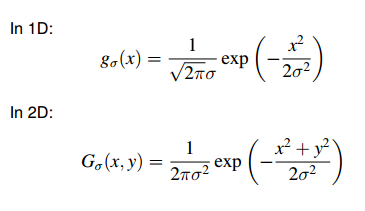
Here are the for 1D and for 2D Gaussian functions. 

In [116]:
test_data64=[]
test_data64_control=[]
test_data64_conv=[]
test_data64_control_conv=[]
test_data64_gaus=[]
test_data64_control_gaus=[]
#Lists for 64x64 image pixels

test_data32=[]
test_data32_control=[]
test_data32_conv=[]
test_data32_control_conv=[]
test_data32_gaus=[]
test_data32_control_gaus=[]
#Lists for 32x32 image pixels
# Lists for each other filters and image sizes

In [117]:
#Appending each images 64x64
test_covidtext="chest_xray\\test\\covid"

imfilelist = [os.path.join(test_covidtext,f) for f in os.listdir(test_covidtext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(64,64))# Resized 64x64 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Making grayscale 
    test_data64.append(image)
    test_data64_control.append(["c",image]) #Appending each image with label later using it on KNN function
    convimage=convolutionalFilter(image)
    test_data64_conv.append(convimage)
    test_data64_control_conv.append(["c",convimage])
    gausimage=gaussianBlur(image)
    test_data64_gaus.append(gausimage)
    test_data64_control_gaus.append(["c",gausimage])
#The process of 32x32 and other filters are the same

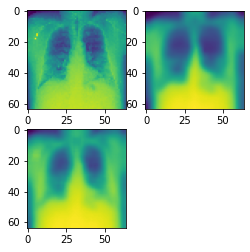

In [118]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(test_data64[1])
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(test_data64_conv[1])
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(test_data64_gaus[1])
plt.show()
#Here are the samples for each image; normal, convoluional2D, gaussian left to right respectively

Example of filterings; normal, convolutional2D, gaussian respectively.

In [119]:
#Appending each images 32x32
test_covidtext="chest_xray\\test\\covid"
imfilelist = [os.path.join(test_covidtext,f) for f in os.listdir(test_covidtext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(32,32)) #The only difference between first for loop and this is using 32x32 immages
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data32.append(image)
    test_data32_control.append(["c",image])
    convimage=convolutionalFilter(image)
    test_data32_conv.append(convimage)
    test_data32_control_conv.append(["c",convimage])
    gausimage=gaussianBlur(image)
    test_data32_gaus.append(gausimage)
    test_data32_control_gaus.append(["c",gausimage])


In [120]:
#Appending each images 64x64
test_normaltext="chest_xray\\test\\normal"
imfilelist = [os.path.join(test_normaltext,f) for f in os.listdir(test_normaltext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data64.append(image)
    test_data64_control.append(["n",image])
    convimage=convolutionalFilter(image)
    test_data64_conv.append(convimage)
    test_data64_control_conv.append(["n",convimage])
    gausimage=gaussianBlur(image)
    test_data64_gaus.append(gausimage)
    test_data64_control_gaus.append(["n",gausimage])
    


In [121]:
#Appending each images 32x32

test_normaltext="chest_xray\\test\\normal"

imfilelist = [os.path.join(test_normaltext,f) for f in os.listdir(test_normaltext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(32,32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data32.append(image)
    test_data32_control.append(["n",image])
    convimage=convolutionalFilter(image)
    test_data32_conv.append(convimage)
    test_data32_control_conv.append(["n",convimage])
    gausimage=gaussianBlur(image)
    test_data32_gaus.append(gausimage)
    test_data32_control_gaus.append(["n",gausimage])

In [122]:
#Appending each images 64x64
test_pneumoniatext="chest_xray\\test\\pneumonia"
imfilelist = [os.path.join(test_pneumoniatext,f) for f in os.listdir(test_pneumoniatext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data64.append(image)
    test_data64_control.append(["p",image])
    convimage=convolutionalFilter(image)
    test_data64_conv.append(convimage)
    test_data64_control_conv.append(["p",convimage])
    gausimage=gaussianBlur(image)
    test_data64_gaus.append(gausimage)
    test_data64_control_gaus.append(["p",gausimage])

In [123]:
#Appending each images 32x32
test_pneumoniatext="chest_xray\\test\\pneumonia"
imfilelist = [os.path.join(test_pneumoniatext,f) for f in os.listdir(test_pneumoniatext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(32,32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data32.append(image)
    test_data32_control.append(["p",image])
    convimage=convolutionalFilter(image)
    test_data32_conv.append(convimage)
    test_data32_control_conv.append(["p",convimage])
    gausimage=gaussianBlur(image)
    test_data32_gaus.append(gausimage)
    test_data32_control_gaus.append(["p",gausimage])

In [124]:
train_data64 = []
train_data64_conv=[]
train_data64_gaus=[]
#Lists for 64x64 image pixels

train_data32 = []
train_data32_conv=[]
train_data32_gaus=[]
#Lists for 32x32 image pixels


In [125]:
#Appending each images 64x64

train_covidtext="chest_xray\\train\\covid"

imfilelist = [os.path.join(train_covidtext,f) for f in os.listdir(train_covidtext) if f.endswith(".jpg")]
train_data64 = []
train_data64_conv=[]
train_data64_gaus=[]
for img in imfilelist:#Train sets similiar to test set for loops
    image = cv2.imread(img)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data64.append(["c",image])
    convimage=convolutionalFilter(image)
    train_data64_conv.append(["c",convimage])
    gausimage=gaussianBlur(image)
    train_data64_gaus.append(["c",gausimage])

In [126]:
#Appending each images 32x32

train_covidtext="chest_xray\\train\\covid"

imfilelist = [os.path.join(train_covidtext,f) for f in os.listdir(train_covidtext) if f.endswith(".jpg")]
train_data32 = []
train_data32_conv=[]
train_data32_gaus=[]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(32,32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data32.append(["c",image])
    convimage=convolutionalFilter(image)
    train_data32_conv.append(["c",convimage])
    gausimage=gaussianBlur(image)
    train_data32_gaus.append(["c",gausimage])

In [127]:
#Appending each images 64x64

train_normaltext="chest_xray\\train\\normal"

imfilelist = [os.path.join(train_normaltext,f) for f in os.listdir(train_normaltext) if f.endswith(".jpg")]

for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data64.append(["n",image])
    convimage=convolutionalFilter(image)
    train_data64_conv.append(["n",convimage])
    gausimage=gaussianBlur(image)
    train_data64_gaus.append(["n",gausimage])

In [128]:
#Appending each images 32x32
train_normaltext="chest_xray\\train\\normal"

imfilelist = [os.path.join(train_normaltext,f) for f in os.listdir(train_normaltext) if f.endswith(".jpg")]

for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(32,32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data32.append(["n",image])
    convimage=convolutionalFilter(image)
    train_data32_conv.append(["n",convimage])
    gausimage=gaussianBlur(image)
    train_data32_gaus.append(["n",gausimage])

In [129]:
#Appending each images 64x64
train_pneumoniatext="chest_xray\\train\\pneumonia"

imfilelist = [os.path.join(train_pneumoniatext,f) for f in os.listdir(train_pneumoniatext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data64.append(["p",image])
    convimage=convolutionalFilter(image)
    train_data64_conv.append(["p",convimage])
    gausimage=gaussianBlur(image)
    train_data64_gaus.append(["p",gausimage])

In [130]:
#Appending each images 32x32
train_pneumoniatext="chest_xray\\train\\pneumonia"

imfilelist = [os.path.join(train_pneumoniatext,f) for f in os.listdir(train_pneumoniatext) if f.endswith(".jpg")]
for img in imfilelist:
    image = cv2.imread(img)
    image=cv2.resize(image,(32,32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data32.append(["p",image])
    convimage=convolutionalFilter(image)
    train_data32_conv.append(["p",convimage])
    gausimage=gaussianBlur(image)
    train_data32_gaus.append(["p",gausimage])

In [131]:
def KNN(test_data,train_data,num,test_dataKNN):
    for i in range(len(test_data)):
        distance = [] #List for storing distance
        for j in range (len(train_data)):
            distance.append(np.sum(np.abs(train_data[j][1]-test_data[i]))) #Calculating distance between matrices
        neighbours=[] #List for storing nearest neighbour
        #Num = K value in KNN
        for k in range(num):
            neighbours.append(np.argpartition(distance, k)[k]) # Here are calculating n closest neighbour
        pcounter=0 #pneumonia
        ncounter=0 #normal
        ccounter=0 #covid
        #Counters for voting system
        labels=[]
        for nb in neighbours:
            labels.append(train_data[nb][0]) #Appending labels from train data
        iterator=0
        while(iterator!=len(labels)): #iterating each other labels to calculate "p","n","c" counters
            if(labels[iterator]=="p"):
                pcounter+=1
            elif(labels[iterator]=="n"):
                ncounter+=1
            elif(labels[iterator]=="c"):
                ccounter+=1
            iterator+=1
            if(iterator==len(labels)):
                #Here is controling if any p,c or n are equal each other or not
                peqn=False
                ceqn=False
                peqc=False
                if (pcounter>0 and ncounter>0) and (pcounter==ncounter):
                    peqn=True
                if (ccounter>0 and ncounter>0) and (ccounter==ncounter):
                    ceqn=True
                if (pcounter>0 and ccounter>0) and (pcounter==ccounter):
                    peqc=True
                trueControl=[peqn,ceqn,peqc]
                trueCounter=0
                for i in trueControl:
                    if i == True:
                        trueCounter+=1 
                #If one of them are equal the list will shrink and selects first element
                if(trueCounter>=1):
                    labels=labels[0:len(labels)-1]
                    #print(labels)
                    iterator=0
                    pcounter=0
                    ncounter=0
                    ccounter=0
                    #After shrinking makes values 0 again and re-enter the while loop ,calculating everything again
       
        #Here is voting system, decides which one is larger label
        if(ccounter>ncounter and ccounter>pcounter):  
            test_dataKNN.append(["c",test_data[i]])
        elif(ncounter>ccounter and ncounter>pcounter):
            test_dataKNN.append(["n",test_data[i]])
        elif((pcounter>ncounter) and (pcounter>ccounter)):
            test_dataKNN.append(["p",test_data[i]])
        #After if statements it will return choosen label for ith value 
    return test_dataKNN

In [132]:
def weighted_KNN_voting(labels,nn_distances): #Voting function of weighted KNN
    nnsum=0 
    newnn_distances=list()
    for i in nn_distances:#The mathematical progress of "weights". 
        nnsum+=(1/i)
    for i in nn_distances: 
        newnn_distance=(1/i)/(nnsum) 
        newnn_distances.append(newnn_distance) 
    #The Euclidean distance between two items is the square root of the sum of the squared differences of coordinates both of for loops.
    ntotal=0 #Initilaizing total values of each label's distances as variablels 
    ctotal=0
    ptotal=0
    for l, d in zip(labels, newnn_distances): #Calculating each label's distances total value
        if l=="p":
            ptotal+=d
        elif l=="n":
            ntotal+=d
        elif l=="c":
            ctotal+=d
    selectingMax=[ntotal,ctotal,ptotal]
     #After calculating each label totals
    if max(selectingMax)==selectingMax[0]:
        return "n"
    if max(selectingMax)==selectingMax[1]:
        return "c"
    if max(selectingMax)==selectingMax[2]:
        return "p"
    #The deciding if conditions which label has max value. Which means which ones are closer to the point.

In [133]:
def weighted_KNN(test_data,train_data,num,test_dataKNN):
    for i in range(len(test_data)):
        distances = [] #Here is to store distances of every neighbour of each images
        nn_distances=[] #Here is to store closest n neighbours of each images
        for j in range (len(train_data)):
            distances.append(np.sum(np.abs(train_data[j][1]-test_data[i]))) # Process is very close to normal KNN
        neighbours=[]
        for k in range(num):
            distance_index=np.argpartition(distances, k)[k]
            neighbours.append(np.argpartition(distances, k)[k])
            nn_distances.append(distances[distance_index])
        labels=[] # Here is storing each label
        for nb in neighbours:# Appending each neighbour from train set
            labels.append(train_data[nb][0])
        returnLabel=weighted_KNN_voting(labels,nn_distances) #The voting system function. It returns chosen   
        if(returnLabel=="c"):  
            test_dataKNN.append(["c",test_data[i]])
        elif(returnLabel=="n"):
            test_dataKNN.append(["n",test_data[i]])
        elif(returnLabel=="p"):
            test_dataKNN.append(["p",test_data[i]])
        
    return test_dataKNN    

In [134]:
def accuracy_rate(test_data_control,test_dataKNN):
    truevals=0
    falsevals=0
    for i in range(len(test_data_control)):
        if test_data_control[i][0]==test_dataKNN[i][0]:
            truevals+=1
        else:
            falsevals+=1
    accuracy=truevals/(truevals+falsevals)
    accuracy*=100
    return round(accuracy,2)
#Here I made accuracy_rate function for comparing "normal" and "covid and pneumonia"

In [135]:
def precision_rate(test_data_control,test_dataKNN):
    TP=0
    FP=0
    for i in range(len(test_data_control)):
        if test_dataKNN[i][0]=="n":
            if test_data_control[i][0]==test_dataKNN[i][0]:
                TP+=1
            else:
                FP+=1
    precision=TP/(TP+FP)
    precision*=100
    return round(precision,2)
#Here I made precision_rate function for comparing "normal" and "covid and pneumonia"

In [136]:
def recall_rate(test_data_control,test_dataKNN):
    TP=0
    FN=0
    for i in range(len(test_data_control)):
        if test_dataKNN[i][0]=="n":
            if test_data_control[i][0]==test_dataKNN[i][0]:
                TP+=1
           
        elif test_dataKNN[i][0]!="n":
            if test_data_control[i][0]!=test_dataKNN[i][0]:
                FN+=1
            
    recall=TP/(TP+FN)
    recall*=100
    return round(recall,2)
#Here I made recall_rate function for comparing "normal" and "covid and pneumonia"

In [137]:



def confusion_Matrix(test_data_control,test_dataKNN):
    conf_arr = [[0, 0], [0, 0]] #TP #FN #FP #TN
    TP,FN,FP,TN=0,0,0,0
    for i in range(len(test_data_control)):
        if test_dataKNN[i][0]=="n":
            if test_data_control[i][0]==test_dataKNN[i][0]:
                TP+=1
            else:
                FP+=1
        elif test_dataKNN[i][0]!="n":
            if test_data_control[i][0]!=test_dataKNN[i][0]:
                FN+=1
            else:
                TN+=1
    conf_arr=[[TP,FN],[FP,TN]]
    return np.array(conf_arr)
#I made confusion matrix model comparing "normal" and "covid and pneumonia" in control if prediction was "normal" matches with "normal" it will cause true positive points
#If its not normal but still matches with "covid"-"covid" or "pneumonia"-"pneumonia" it will return true negative
#If its prediction was normal but not equals with normal it will return false positive
#If its prediction was other than normal and not equals with "covid"-"covid" or "pneumonia"-"pneumonia" it will return false negative
def confusion_MatrixDisplay(test_data_control,test_dataKNN):
    conf_arr=confusion_Matrix(test_data_control,test_dataKNN)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_arr, display_labels = [True, False])
    return cm_display


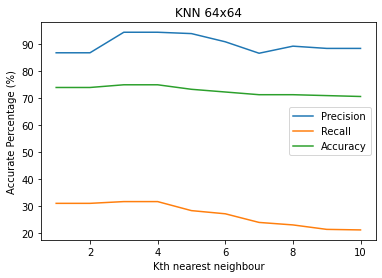

Most accurate K for this model:  3
Accuracy value for best K: % 75.0
Precision value for best K: % 94.44
Recall value for best K: % 31.78


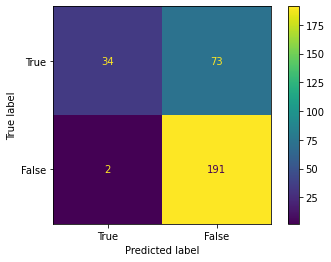

In [138]:
#Firstly starting with 64x64 pixel images
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]

for i in range(1,11):
    test_data64KNN=[]
    test_data64KNN=KNN(test_data64,train_data64,i,test_data64KNN)
    recall_score=recall_rate(test_data64_control,test_data64KNN)
    accuracy_score=accuracy_rate(test_data64_control,test_data64KNN)
    precision_score=precision_rate(test_data64_control,test_data64KNN)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.ylabel('Accurate Percentage (%)')
plt.xlabel("Kth nearest neighbour")
plt.title("KNN 64x64")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=KNN(test_data64,train_data64,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data64_control,bestKPred))
print("Precision value for best K: %",precision_rate(test_data64_control,bestKPred))
print("Recall value for best K: %",recall_rate(test_data64_control,bestKPred))

cm_display=confusion_MatrixDisplay(test_data64_control,bestKPred)
cm_display.plot()
plt.show()

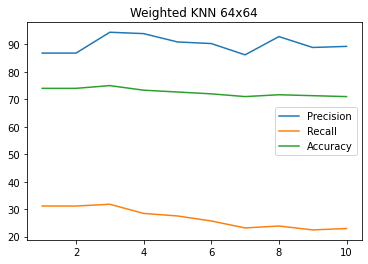

Most accurate K for this model:  3
Accuracy value for best K: % 75.0
Precision value for best K: % 94.44
Recall value for best K: % 31.78


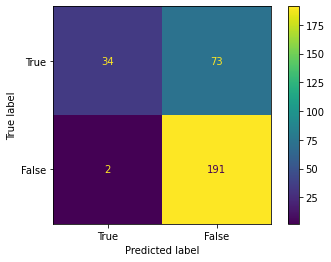

In [139]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]

for i in range(1,11): 
    test_data64KNN=[]
    test_data64KNN=weighted_KNN(test_data64,train_data64,i,test_data64KNN)
    recall_score=recall_rate(test_data64_control,test_data64KNN)
    accuracy_score=accuracy_rate(test_data64_control,test_data64KNN)
    precision_score=precision_rate(test_data64_control,test_data64KNN)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)


#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Weighted KNN 64x64")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=weighted_KNN(test_data64,train_data64,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data64_control,bestKPred))
print("Precision value for best K: %",precision_rate(test_data64_control,bestKPred))
print("Recall value for best K: %",recall_rate(test_data64_control,bestKPred))

cm_display=confusion_MatrixDisplay(test_data64_control,bestKPred)
cm_display.plot()
plt.show()

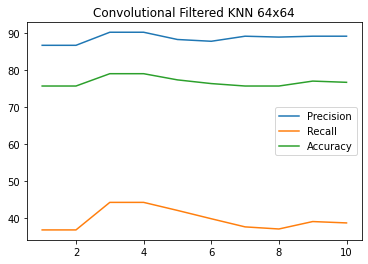

Most accurate K for this model:  3
Accuracy value for best K: % 79.0
Precision value for best K: % 90.2
Recall value for best K: % 44.23


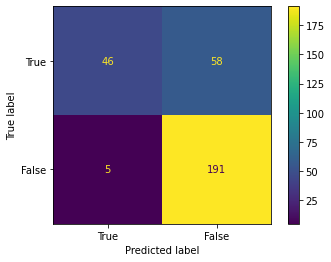

In [140]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data64KNN_conv=[]
    test_data64KNN_conv=KNN(test_data64_conv,train_data64_conv,i,test_data64KNN_conv)   
    recall_score=recall_rate(test_data64_control_conv,test_data64KNN_conv)
    accuracy_score=accuracy_rate(test_data64_control_conv,test_data64KNN_conv)
    precision_score=precision_rate(test_data64_control_conv,test_data64KNN_conv)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)

#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Convolutional Filtered KNN 64x64")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=KNN(test_data64_conv,train_data64_conv,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data64_control_conv,bestKPred))
print("Precision value for best K: %",precision_rate(test_data64_control_conv,bestKPred))
print("Recall value for best K: %",recall_rate(test_data64_control_conv,bestKPred))

cm_display=confusion_MatrixDisplay(test_data64_control_conv,bestKPred)
cm_display.plot()
plt.show()

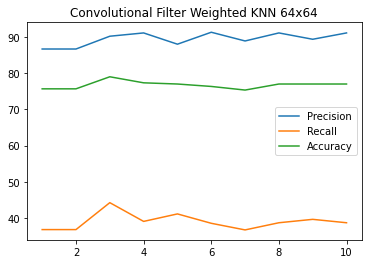

Most accurate K for this model:  3
Accuracy value for best K: % 75.0
Precision value for best K: % 94.44
Recall value for best K: % 31.78


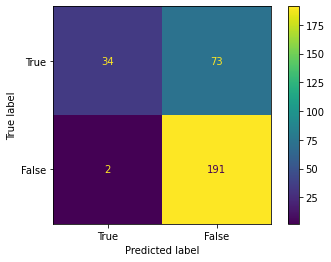

In [141]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data64KNN_conv=[]
    test_data64KNN_conv=weighted_KNN(test_data64_conv,train_data64_conv,i,test_data64KNN_conv)   
    recall_score=recall_rate(test_data64_control_conv,test_data64KNN_conv)
    accuracy_score=accuracy_rate(test_data64_control_conv,test_data64KNN_conv)
    precision_score=precision_rate(test_data64_control_conv,test_data64KNN_conv)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)

#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Convolutional Filter Weighted KNN 64x64")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=weighted_KNN(test_data64,train_data64,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data64_control_conv,bestKPred))
print("Precision value for best K: %",precision_rate(test_data64_control_conv,bestKPred))
print("Recall value for best K: %",recall_rate(test_data64_control_conv,bestKPred))

cm_display=confusion_MatrixDisplay(test_data64_control_conv,bestKPred)
cm_display.plot()
plt.show()

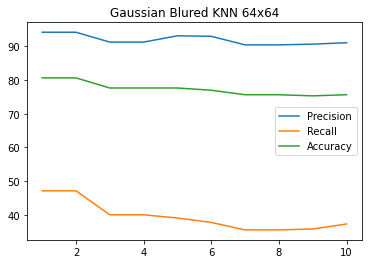

Most accurate K for this model:  1
Accuracy value for best K: % 80.67
Precision value for best K: % 94.23
Recall value for best K: % 47.12


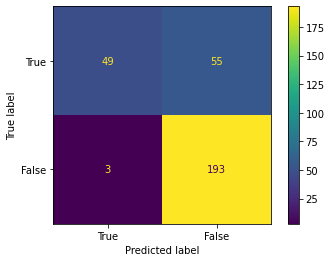

In [142]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data64KNN_gaus=[]
    test_data64KNN_gaus=KNN(test_data64_gaus,train_data64_gaus,i,test_data64KNN_gaus)   
    recall_score=recall_rate(test_data64_control_gaus,test_data64KNN_gaus)
    accuracy_score=accuracy_rate(test_data64_control_gaus,test_data64KNN_gaus)
    precision_score=precision_rate(test_data64_control_gaus,test_data64KNN_gaus)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)

#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Gaussian Blured KNN 64x64")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=KNN(test_data64_gaus,train_data64_gaus,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data64_control_gaus,bestKPred))
print("Precision value for best K: %",precision_rate(test_data64_control_gaus,bestKPred))
print("Recall value for best K: %",recall_rate(test_data64_control_gaus,bestKPred))

cm_display=confusion_MatrixDisplay(test_data64_control_gaus,bestKPred)
cm_display.plot()
plt.show()

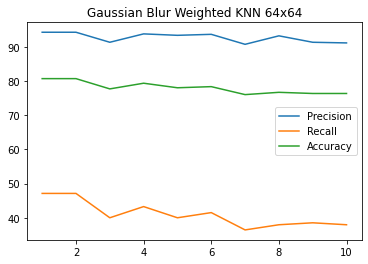

Most accurate K for this model:  1
Accuracy value for best K: % 80.67
Precision value for best K: % 94.23
Recall value for best K: % 47.12


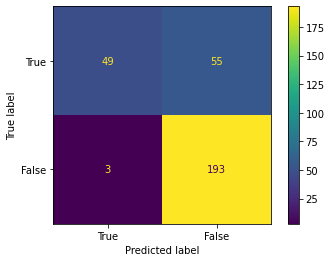

In [143]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data64KNN_gaus=[]
    test_data64KNN_gaus=weighted_KNN(test_data64_gaus,train_data64_gaus,i,test_data64KNN_gaus)   
    recall_score=recall_rate(test_data64_control_gaus,test_data64KNN_gaus)
    accuracy_score=accuracy_rate(test_data64_control_gaus,test_data64KNN_gaus)
    precision_score=precision_rate(test_data64_control_gaus,test_data64KNN_gaus)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Gaussian Blur Weighted KNN 64x64")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value

bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=weighted_KNN(test_data64_gaus,train_data64_gaus,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data64_control_gaus,bestKPred))
print("Precision value for best K: %",precision_rate(test_data64_control_gaus,bestKPred))
print("Recall value for best K: %",recall_rate(test_data64_control_gaus,bestKPred))
cm_display=confusion_MatrixDisplay(test_data64_control_gaus,bestKPred)
cm_display.plot()
plt.show()

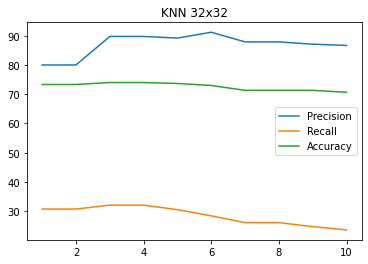

Most accurate K for this model:  3
Accuracy value for best K: % 74.0
Precision value for best K: % 89.74
Recall value for best K: % 32.11


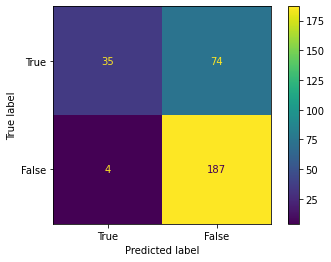

In [144]:
#Then for 32x32 images
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data32KNN=[]
    test_data32KNN=KNN(test_data32,train_data32,i,test_data32KNN)
    recall_score=recall_rate(test_data32_control,test_data32KNN)
    accuracy_score=accuracy_rate(test_data32_control,test_data32KNN)
    precision_score=precision_rate(test_data32_control,test_data32KNN)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("KNN 32x32")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=KNN(test_data32,train_data32,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data32_control,bestKPred))
print("Precision value for best K: %",precision_rate(test_data32_control,bestKPred))
print("Recall value for best K: %",recall_rate(test_data32_control,bestKPred))
cm_display=confusion_MatrixDisplay(test_data32_control,bestKPred)
cm_display.plot()
plt.show()

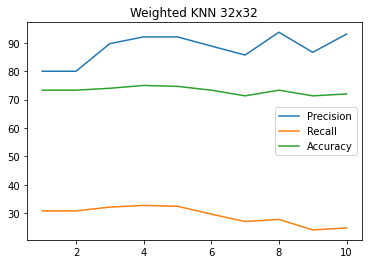

Most accurate K for this model:  4
Accuracy value for best K: % 75.0
Precision value for best K: % 92.11
Recall value for best K: % 32.71


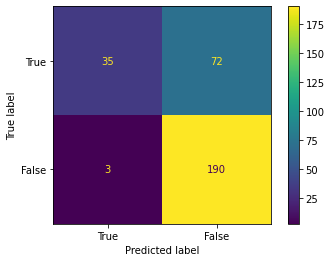

In [145]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11): 
    test_data32KNN=[]
    test_data32KNN=weighted_KNN(test_data32,train_data32,i,test_data32KNN)
    recall_score=recall_rate(test_data32_control,test_data32KNN)
    accuracy_score=accuracy_rate(test_data32_control,test_data32KNN)
    precision_score=precision_rate(test_data32_control,test_data32KNN)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Weighted KNN 32x32")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=weighted_KNN(test_data32,train_data32,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data32_control,bestKPred))
print("Precision value for best K: %",precision_rate(test_data32_control,bestKPred))
print("Recall value for best K: %",recall_rate(test_data32_control,bestKPred))
cm_display=confusion_MatrixDisplay(test_data32_control,bestKPred)
cm_display.plot()
plt.show()

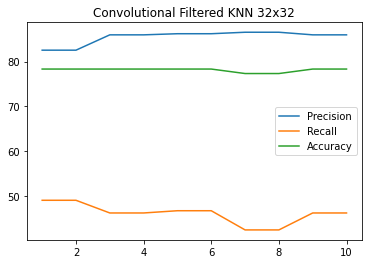

Most accurate K for this model:  1
Accuracy value for best K: % 78.33
Precision value for best K: % 82.54
Recall value for best K: % 49.06


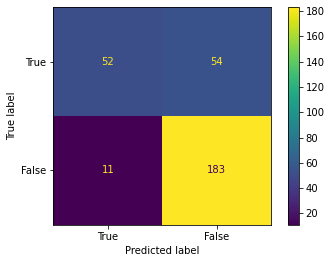

In [146]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data32KNN_conv=[]
    test_data32KNN_conv=KNN(test_data32_conv,train_data32_conv,i,test_data32KNN_conv)   
    recall_score=recall_rate(test_data32_control_conv,test_data32KNN_conv)
    accuracy_score=accuracy_rate(test_data32_control_conv,test_data32KNN_conv)
    precision_score=precision_rate(test_data32_control_conv,test_data32KNN_conv)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Convolutional Filtered KNN 32x32")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=KNN(test_data32_conv,train_data32_conv,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data32_control_conv,bestKPred))
print("Precision value for best K: %",precision_rate(test_data32_control_conv,bestKPred))
print("Recall value for best K: %",recall_rate(test_data32_control_conv,bestKPred))
cm_display=confusion_MatrixDisplay(test_data32_control_conv,bestKPred)
cm_display.plot()
plt.show()

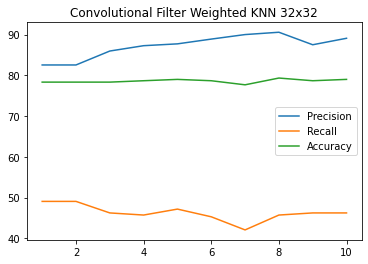

Most accurate K for this model:  8
Accuracy value for best K: % 79.33
Precision value for best K: % 90.57
Recall value for best K: % 45.71


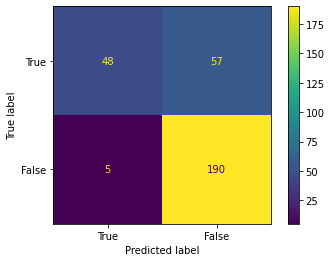

In [147]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data32KNN_conv=[]
    test_data32KNN_conv=weighted_KNN(test_data32_conv,train_data32_conv,i,test_data32KNN_conv)   
    recall_score=recall_rate(test_data32_control_conv,test_data32KNN_conv)
    accuracy_score=accuracy_rate(test_data32_control_conv,test_data32KNN_conv)
    precision_score=precision_rate(test_data32_control_conv,test_data32KNN_conv)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Convolutional Filter Weighted KNN 32x32")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=weighted_KNN(test_data32_conv,train_data32_conv,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data32_control_conv,bestKPred))
print("Precision value for best K: %",precision_rate(test_data32_control_conv,bestKPred))
print("Recall value for best K: %",recall_rate(test_data32_control_conv,bestKPred))
cm_display=confusion_MatrixDisplay(test_data32_control_conv,bestKPred)
cm_display.plot()
plt.show()

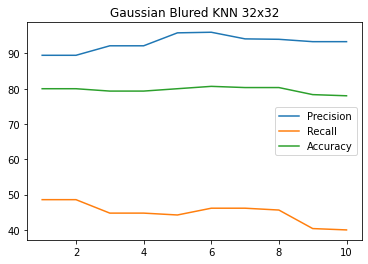

Most accurate K for this model:  6
Accuracy value for best K: % 80.67
Precision value for best K: % 96.0
Recall value for best K: % 46.15


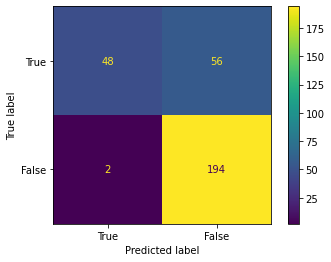

In [148]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data32KNN_gaus=[]
    test_data32KNN_gaus=KNN(test_data32_gaus,train_data32_gaus,i,test_data32KNN_gaus)   
    recall_score=recall_rate(test_data32_control_gaus,test_data32KNN_gaus)
    accuracy_score=accuracy_rate(test_data32_control_gaus,test_data32KNN_gaus)
    precision_score=precision_rate(test_data32_control_gaus,test_data32KNN_gaus)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Gaussian Blured KNN 32x32")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=KNN(test_data32_gaus,train_data32_gaus,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data32_control_gaus,bestKPred))
print("Precision value for best K: %",precision_rate(test_data32_control_gaus,bestKPred))
print("Recall value for best K: %",recall_rate(test_data32_control_gaus,bestKPred))
cm_display=confusion_MatrixDisplay(test_data32_control_gaus,bestKPred)
cm_display.plot()
plt.show()

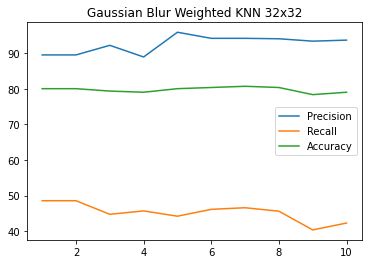

Most accurate K for this model:  7
Accuracy value for best K: % 80.67
Precision value for best K: % 94.12
Recall value for best K: % 46.6


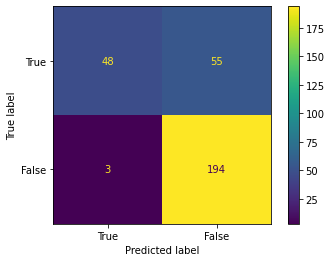

In [149]:
precision_scores=[]
recall_scores=[]
accuracy_scores=[]
x_line=[]
for i in range(1,11):
    test_data32KNN_gaus=[]
    test_data32KNN_gaus=weighted_KNN(test_data32_gaus,train_data32_gaus,i,test_data32KNN_gaus)   
    recall_score=recall_rate(test_data32_control_gaus,test_data32KNN_gaus)
    accuracy_score=accuracy_rate(test_data32_control_gaus,test_data32KNN_gaus)
    precision_score=precision_rate(test_data32_control_gaus,test_data32KNN_gaus)
    precision_scores.append(precision_score)
    recall_scores.append(recall_score)
    accuracy_scores.append(accuracy_score)
    x_line.append(i)
#Graphical show for each K
plt.plot(x_line, precision_scores, label = "Precision")
plt.plot(x_line, recall_scores, label = "Recall")
plt.plot(x_line, accuracy_scores, label = "Accuracy")
plt.title("Gaussian Blur Weighted KNN 32x32")
plt.legend()
plt.show()
#Confusion Matrix Show for best K value
bestK=accuracy_scores.index(max(accuracy_scores))+1
print("Most accurate K for this model: ",bestK)
bestKPred=[]
bestKPred=weighted_KNN(test_data32_gaus,train_data32_gaus,bestK,bestKPred)
print("Accuracy value for best K: %",accuracy_rate(test_data32_control_gaus,bestKPred))
print("Precision value for best K: %",precision_rate(test_data32_control_gaus,bestKPred))
print("Recall value for best K: %",recall_rate(test_data32_control_gaus,bestKPred))
cm_display=confusion_MatrixDisplay(test_data32_control_gaus,bestKPred)
cm_display=confusion_MatrixDisplay(test_data32_control_gaus,bestKPred)
cm_display.plot()
plt.show()

Experiments | Model Type | Filter Type | Image Size | Best K Value | Accuracy (%) | Precision (%) | Recall (%) |
:-: |:-: |:-: |:-: |:-: |:-: |:-: |:-: 
1 | KNN | Unfiltered |64 x 64 | 3 | 75.00 | 94.44 | 31.78 | 
2 | weighted-KNN | Unfiltered |64 x 64 | 3 | 75.00 | 94.44 | 31.78 | 
3 | KNN | Convolutional2D |64 x 64 | 3 | 79.00 | 90.00 | 44.23 | 
4 | weighted-KNN | Convolutional2D |64 x 64 | 3 | 75.00 | 94.44 | 31.78 | 
5 | KNN | Gaussian |64 x 64 | 1 | 80.67 | 94.23 | 47.12 | 
6 | weighted-KNN | Gaussian |64 x 64 |  1 | 80.67 | 94.23 | 47.12 |  
7 | KNN | Unfiltered |32 x 32 | 3 | 74.00 | 89.74 | 32.11 | 
8 | weighted-KNN | Unfiltered |32 x 32 | 4 | 75.00 | 92.11 | 32.71 | 
9 | KNN | Convolutional2D |32 x 32 | 1 | 78.33 | 82.54 | 49.06 | 
10 | weighted-KNN | Convolutional2D |32 x 32 | 8 | 79.33 | 90.57 | 45.71 | 
11| KNN | Gaussian |32 x 32 | 6 | 80.67 | 96.00 | 46.15 | 
12| weighted-KNN | Gaussian |32 x 32 | 7 | 80.67 | 94.12 | 46.60 | 


All of the accuracy, precision and recall values calculated on best K value.

-Runned in 25/10/2022

# Conclusion and Error Analysis

## General Lookout
According to the all data, usually best k values are between 1 and 4 including 1 and 4. Best accuracy rates in Gaussian filtered images, least are normal unfiltered KNN. When making KNN as weighted, if based on general look to data, it has no positive proportionally effect on accuracy rate neither negative. Model can calculate precision values very well, which means model can easily see which ones are "normal" in "normal"s. However model has low recall rate, which means model's prediction performance estimating "normal" in full dataset, is poor. Here as seen image sizes are not that important about model's accuracy even 32x32 better due they have less data than 64x64, the model can train faster.

For general looking algorithmic performance, model is brute force. However program can be written dynamic programming with more complex layout. With 32x32 images, model works faster than 64x64s due to data size as mentioned. 

## Errors Analysis
While looking to the images has given, model may give a wrong label especially in chest X-rays containing electrical devices or metal pieces or just two samples that are just similiar to each other. Here is normal mislabeled sample and a pneumonia samples:


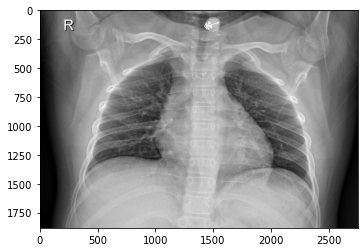
Figure 1: Xray from a normal person which was labeled as pneumonia

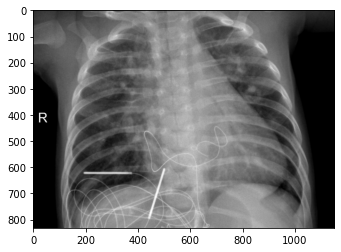
Figure 2: Xray from a pneumonia diognised person who has electrical device in her/him lungs

Another reason for mislabelings above, could be result of the white "R" letters on the left side of both images. Because the 2 letters do not overlap, it contributes to a higher distance between 2 images that are otherwise similiar, and of same labels. 